# Модуль А

Импортируем необходимые библиотеки для работы с данным модулем: будем пользоваться модулем pandas для работы с набором данных и его представлением, а также с моделями seaborn и matplotlib для визуализации данных. Также понадобится модуль sklearn для скалирования данных.

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Произведем загрузку датасета из формата csv в объект pd.DataFrame для удобной работы с данными и их представлением. Укажем кодировку в параметрах загрузки метода pd.read_csv для того, чтобы текстовые данные отображались корректно, а также разделитель '|', при помощи которого разделены данные в исходном представлении. Помимо этого, поскольку в начальном наборе данных присутствовал такой агрегат данных, как дата, необходимо обработать ее и указать правильное представление при помощи параметра parse_dates, в которые помещается атрибут, отвечающий за данный агрегат.

In [142]:
df = pd.read_csv("albums.csv", encoding="utf8", sep='|', parse_dates=['release_date'])
df

,Unnamed: 0,id,name,release_date,artists,total_tracks,t_name0,t_name1,t_name2,t_dur0,...,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity
0,0,0,Ya Solo Eres Mi Ex,2021-09-09,"La Adictiva Banda San José de Mesillas,",7,Ya Solo Eres Mi Ex,La Malagueña,México Lindo y Querido,222133,...,0.626,0.878,0.833,74.924,126.970,197.836,4.0,3.0,3.0,51.0
1,1,1,Nibiru,2019-11-29,"Ozuna,",18,Nibiru,Hasta Que Salga el Sol,Temporal,158826,...,0.158,0.598,0.484,173.023,96.042,148.019,4.0,4.0,4.0,67.0
2,2,2,DAMN.,2017-04-14,"Kendrick Lamar,",14,BLOOD.,DNA.,YAH.,118066,...,0.494,0.422,0.648,156.907,139.913,69.986,4.0,4.0,4.0,81.0
3,3,3,Did I Shave My Legs For This?,1996-01-01,"Deana Carter,",11,I've Loved Enough To Know,We Danced Anyway,Count Me In,203693,...,0.755,0.651,0.263,120.285,94.054,130.011,4.0,4.0,4.0,53.0
4,4,4,glisten,2018-05-04,"Jeremy Zucker,",4,all the kids are depressed,wildfire,glisten (interlude),169973,...,0.707,0.426,0.466,103.861,129.170,116.349,4.0,4.0,4.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181202,21202,181202,Watermelon Hero,2021-07-23,"TisaKorean,",1,Watermelon Hero,NaN,NaN,100179,...,0.645,NaN,NaN,72.059,NaN,NaN,4.0,NaN,NaN,NaN
181203,21203,181203,Fibonacci,2018-03-04,"Malz Monday,",1,Fibonacci,NaN,NaN,159503,...,0.642,NaN,NaN,176.344,NaN,NaN,4.0,NaN,NaN,NaN
181204,21204,181204,Rewrite The Stars (with James Arthur & Anne-Ma...,2018-10-25,"James Arthur, Anne-Marie,",1,Rewrite The Stars (with James Arthur & Anne-Ma...,NaN,NaN,218293,...,0.571,NaN,NaN,125.944,NaN,NaN,4.0,NaN,NaN,NaN
181205,21205,181205,Mixed Emotions,2019-11-15,"Luh Kel,",12,Hero,Cold Heart,Wrong,127164,...,0.756,0.637,0.390,149.840,129.882,120.099,4.0,4.0,4.0,NaN


Начнем работу с набором данных с обработки даты. Поскольку в исходном датасете могли быть некорректнеы данные, соответствующие данному столбцу, приведем его к типу даты, причем, если содержатся некорректные данные, заменим их на NaT при помощи функции pd.to_datetime с параметром errors = 'coerce'.

In [143]:
df["release_date"] = pd.to_datetime(df["release_date"], errors='coerce')

Удалим все записи из набора данных, в которых содержится некорректная дата (это стало понятно по наличию NaT в записях)

In [144]:
df = df.dropna(subset=['release_date'])

Произведем парсинг даты. Разделим ее на три самостоятельные колонки: год, месяц и число. Удалим исходный агрегат данных, так как теперь он представлен в другом виде.

In [145]:
df['year'] = pd.DatetimeIndex(df['release_date']).year
df['month'] = pd.DatetimeIndex(df['release_date']).month
df['day'] = pd.DatetimeIndex(df['release_date']).day
df.drop(['release_date'], axis=1, inplace=True)

<ipython-input-145-08c16a9aa0b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.DatetimeIndex(df['release_date']).year
<ipython-input-145-08c16a9aa0b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.DatetimeIndex(df['release_date']).month
<ipython-input-145-08c16a9aa0b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

Выведем базовую информацию о наборе данных: типы столбцов, количество пропущенных значений.

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181200 entries, 0 to 181206
Data columns (total 48 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    181200 non-null  int64  
 1   id            181200 non-null  int64  
 2   name          181199 non-null  object 
 3   artists       181200 non-null  object 
 4   total_tracks  181200 non-null  int64  
 5   t_name0       181199 non-null  object 
 6   t_name1       127198 non-null  object 
 7   t_name2       122879 non-null  object 
 8   t_dur0        181200 non-null  int64  
 9   t_dur1        127198 non-null  float64
 10  t_dur2        122879 non-null  float64
 11  t_dance0      180950 non-null  float64
 12  t_dance1      127059 non-null  float64
 13  t_dance2      122796 non-null  float64
 14  t_energy0     180950 non-null  float64
 15  t_energy1     127059 non-null  float64
 16  t_energy2     122796 non-null  float64
 17  t_key0        180950 non-null  float64
 18  t_ke

Выведем информацию о числе пропусков в данных.

In [147]:
df.isna().sum()

Unnamed: 0          0
id                  0
name                1
artists             0
total_tracks        0
t_name0             1
t_name1         54002
t_name2         58321
t_dur0              0
t_dur1          54002
t_dur2          58321
t_dance0          250
t_dance1        54141
t_dance2        58404
t_energy0         250
t_energy1       54141
t_energy2       58404
t_key0            250
t_key1          54141
t_key2          58404
t_mode0           250
t_mode1         54141
t_mode2         58404
t_speech0         250
t_speech1       54141
t_speech2       58404
t_acous0          250
t_acous1        54141
t_acous2        58404
t_ins0            250
t_ins1          54141
t_ins2          58404
t_live0           250
t_live1         54141
t_live2         58404
t_val0            250
t_val1          54141
t_val2          58404
t_tempo0          250
t_tempo1        54141
t_tempo2        58404
t_sig0            250
t_sig1          54141
t_sig2          58404
popularity      21206
year      

Заключаем, что в наборе данных имеются как категориальные, так и вещественные признаки, причем они содержат пустые значения, с которыми нужно работать, так как не все модели могут работать с пропусками.

Произведем первичный анализ признаков: удалим столбцы с номерами записи, а также синонимы названия песни на других языках: эти данные не имеют ценности для анализа, поэтому ими можно принебречь.

In [148]:
df.drop(columns=["Unnamed: 0", "id", "t_name1", "t_name2"], axis=1, inplace=True)
df

<ipython-input-148-5729c82a5f24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Unnamed: 0", "id", "t_name1", "t_name2"], axis=1, inplace=True)


,name,artists,total_tracks,t_name0,t_dur0,t_dur1,t_dur2,t_dance0,t_dance1,t_dance2,...,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity,year,month,day
0,Ya Solo Eres Mi Ex,"La Adictiva Banda San José de Mesillas,",7,Ya Solo Eres Mi Ex,222133,189133.0,165586.0,0.455,0.699,0.456,...,74.924,126.970,197.836,4.0,3.0,3.0,51.0,2021,9,9
1,Nibiru,"Ozuna,",18,Nibiru,158826,188480.0,238293.0,0.814,0.826,0.697,...,173.023,96.042,148.019,4.0,4.0,4.0,67.0,2019,11,29
2,DAMN.,"Kendrick Lamar,",14,BLOOD.,118066,185946.0,160293.0,0.357,0.638,0.670,...,156.907,139.913,69.986,4.0,4.0,4.0,81.0,2017,4,14
3,Did I Shave My Legs For This?,"Deana Carter,",11,I've Loved Enough To Know,203693,202533.0,205373.0,0.640,0.629,0.616,...,120.285,94.054,130.011,4.0,4.0,4.0,53.0,1996,1,1
4,glisten,"Jeremy Zucker,",4,all the kids are depressed,169973,163000.0,89106.0,0.773,0.488,0.653,...,103.861,129.170,116.349,4.0,4.0,4.0,70.0,2018,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181202,Watermelon Hero,"TisaKorean,",1,Watermelon Hero,100179,NaN,NaN,0.680,NaN,NaN,...,72.059,NaN,NaN,4.0,NaN,NaN,NaN,2021,7,23
181203,Fibonacci,"Malz Monday,",1,Fibonacci,159503,NaN,NaN,0.563,NaN,NaN,...,176.344,NaN,NaN,4.0,NaN,NaN,NaN,2018,3,4
181204,Rewrite The Stars (with James Arthur & Anne-Ma...,"James Arthur, Anne-Marie,",1,Rewrite The Stars (with James Arthur & Anne-Ma...,218293,NaN,NaN,0.670,NaN,NaN,...,125.944,NaN,NaN,4.0,NaN,NaN,NaN,2018,10,25
181205,Mixed Emotions,"Luh Kel,",12,Hero,127164,134688.0,130876.0,0.535,0.756,0.745,...,149.840,129.882,120.099,4.0,4.0,4.0,NaN,2019,11,15


ПОскольку целевым признаком является значение popularity, удалим записи, в которых отсутствует значение признака, поскольку если мы будем заполнять его, то можем исказить качество модели.

In [149]:
df = df.dropna(subset=['popularity'])
df

,name,artists,total_tracks,t_name0,t_dur0,t_dur1,t_dur2,t_dance0,t_dance1,t_dance2,...,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity,year,month,day
0,Ya Solo Eres Mi Ex,"La Adictiva Banda San José de Mesillas,",7,Ya Solo Eres Mi Ex,222133,189133.0,165586.0,0.455,0.699,0.456,...,74.924,126.970,197.836,4.0,3.0,3.0,51.0,2021,9,9
1,Nibiru,"Ozuna,",18,Nibiru,158826,188480.0,238293.0,0.814,0.826,0.697,...,173.023,96.042,148.019,4.0,4.0,4.0,67.0,2019,11,29
2,DAMN.,"Kendrick Lamar,",14,BLOOD.,118066,185946.0,160293.0,0.357,0.638,0.670,...,156.907,139.913,69.986,4.0,4.0,4.0,81.0,2017,4,14
3,Did I Shave My Legs For This?,"Deana Carter,",11,I've Loved Enough To Know,203693,202533.0,205373.0,0.640,0.629,0.616,...,120.285,94.054,130.011,4.0,4.0,4.0,53.0,1996,1,1
4,glisten,"Jeremy Zucker,",4,all the kids are depressed,169973,163000.0,89106.0,0.773,0.488,0.653,...,103.861,129.170,116.349,4.0,4.0,4.0,70.0,2018,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,"Guqin Music ""The Pure Sound of Mountain and Wa...","Shuishan Yu,",16,Moon Over the Mountain Pass,120160,158173.0,159586.0,0.595,0.552,0.588,...,113.183,89.293,127.684,4.0,4.0,4.0,28.0,2009,1,1
159996,Jalebi Baby (Tesher x Jason Derulo) [DallasK R...,"Tesher, Jason Derulo, DallasK,",1,Jalebi Baby (Tesher x Jason Derulo) [DallasK R...,161061,NaN,NaN,0.809,NaN,NaN,...,118.084,NaN,NaN,4.0,NaN,NaN,50.0,2021,8,20
159997,Country Again (Side A),"Thomas Rhett,",11,Want It Again,172586,181266.0,171333.0,0.489,0.629,0.359,...,91.250,104.971,174.079,4.0,4.0,4.0,68.0,2021,4,30
159998,Hmm,"Gjesti,",1,Hmm,134265,NaN,NaN,0.888,NaN,NaN,...,95.021,NaN,NaN,4.0,NaN,NaN,41.0,2021,6,25


Удаляем дубликаты в данных.

In [150]:
df = df.drop_duplicates(ignore_index=True)
df

,name,artists,total_tracks,t_name0,t_dur0,t_dur1,t_dur2,t_dance0,t_dance1,t_dance2,...,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity,year,month,day
0,Ya Solo Eres Mi Ex,"La Adictiva Banda San José de Mesillas,",7,Ya Solo Eres Mi Ex,222133,189133.0,165586.0,0.455,0.699,0.456,...,74.924,126.970,197.836,4.0,3.0,3.0,51.0,2021,9,9
1,Nibiru,"Ozuna,",18,Nibiru,158826,188480.0,238293.0,0.814,0.826,0.697,...,173.023,96.042,148.019,4.0,4.0,4.0,67.0,2019,11,29
2,DAMN.,"Kendrick Lamar,",14,BLOOD.,118066,185946.0,160293.0,0.357,0.638,0.670,...,156.907,139.913,69.986,4.0,4.0,4.0,81.0,2017,4,14
3,Did I Shave My Legs For This?,"Deana Carter,",11,I've Loved Enough To Know,203693,202533.0,205373.0,0.640,0.629,0.616,...,120.285,94.054,130.011,4.0,4.0,4.0,53.0,1996,1,1
4,glisten,"Jeremy Zucker,",4,all the kids are depressed,169973,163000.0,89106.0,0.773,0.488,0.653,...,103.861,129.170,116.349,4.0,4.0,4.0,70.0,2018,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72347,Souvenir,"Zpextre,",1,Souvenir,211152,NaN,NaN,0.596,NaN,NaN,...,166.001,NaN,NaN,4.0,NaN,NaN,26.0,2018,12,15
72348,Ezra,"Becca VanDerbeck,",1,Ezra,174000,NaN,NaN,0.559,NaN,NaN,...,94.350,NaN,NaN,4.0,NaN,NaN,24.0,2018,9,17
72349,No Love,"YYx2Beatz,",1,No Love,157500,NaN,NaN,0.796,NaN,NaN,...,160.022,NaN,NaN,4.0,NaN,NaN,1.0,2021,6,3
72350,ВЫПУСКНИК,"ФОГЕЛЬ,",1,ВЫПУСКНИК,228093,NaN,NaN,0.782,NaN,NaN,...,80.011,NaN,NaN,4.0,NaN,NaN,36.0,2020,6,19


Запишем отдельно названия вещественных признаков и категориальных: в дальнейшем, это поможет при анализе.

In [151]:
num_col = []
cat_col = []
for col in df.columns:
    if df.dtypes[col] in ('int64', 'float64'):
        num_col.append(col)
    else:
        cat_col.append(col)

In [152]:
df.isna().sum()

name                0
artists             0
total_tracks        0
t_name0             0
t_dur0              0
t_dur1          30030
t_dur2          32421
t_dance0           80
t_dance1        30088
t_dance2        32464
t_energy0          80
t_energy1       30088
t_energy2       32464
t_key0             80
t_key1          30088
t_key2          32464
t_mode0            80
t_mode1         30088
t_mode2         32464
t_speech0          80
t_speech1       30088
t_speech2       32464
t_acous0           80
t_acous1        30088
t_acous2        32464
t_ins0             80
t_ins1          30088
t_ins2          32464
t_live0            80
t_live1         30088
t_live2         32464
t_val0             80
t_val1          30088
t_val2          32464
t_tempo0           80
t_tempo1        30088
t_tempo2        32464
t_sig0             80
t_sig1          30088
t_sig2          32464
popularity          0
year                0
month               0
day                 0
dtype: int64

Поскольку у нас в наборе данных присутствует большое количество признаков-синонимов, выявим, насколько сильно они выражаются через друг друга, потому что "синонимы" имеют огромное число пропусков: чтобы не искажать данные, если они детерминированы, удалим их, исходя из их корреляции. Для этого построим тепловую карту с попарной корреляцией вещественных признаков.

<Axes: >

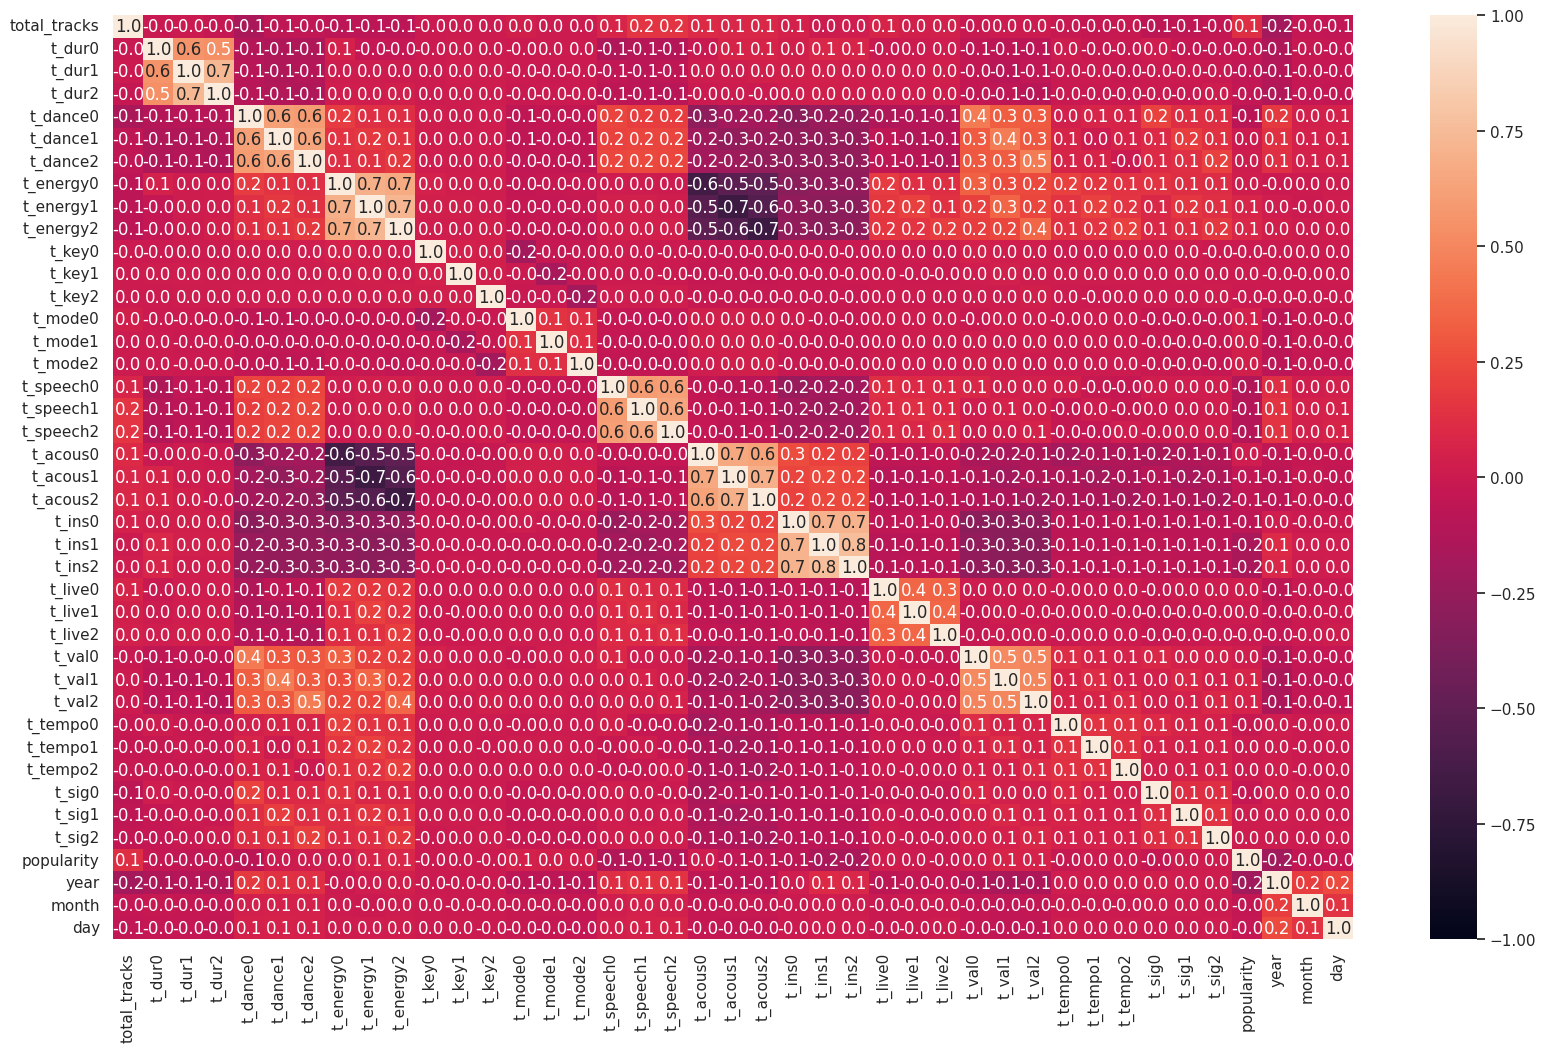

In [153]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(data=df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt='.1f')

Видим, что в наборе данных присутствуют пары признаков, которые имеют высокую корреляцию, значит, их можно удалить, чтобы избавиться от мультиколлинеарности в данных и от данных, которые имеют огромное число пропусков.

In [154]:
df.drop(columns=["t_energy1", "t_energy2", "t_ins1", "t_ins2", "t_acous1", "t_acous2", "t_dur2", "t_dance1", "t_dance2"], axis=1, inplace=True)
df.isna().sum()

<ipython-input-154-f52f3fda79fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["t_energy1", "t_energy2", "t_ins1", "t_ins2", "t_acous1", "t_acous2", "t_dur2", "t_dance1", "t_dance2"], axis=1, inplace=True)


name                0
artists             0
total_tracks        0
t_name0             0
t_dur0              0
t_dur1          30030
t_dance0           80
t_energy0          80
t_key0             80
t_key1          30088
t_key2          32464
t_mode0            80
t_mode1         30088
t_mode2         32464
t_speech0          80
t_speech1       30088
t_speech2       32464
t_acous0           80
t_ins0             80
t_live0            80
t_live1         30088
t_live2         32464
t_val0             80
t_val1          30088
t_val2          32464
t_tempo0           80
t_tempo1        30088
t_tempo2        32464
t_sig0             80
t_sig1          30088
t_sig2          32464
popularity          0
year                0
month               0
day                 0
dtype: int64

Будем исследовать признаки, которые имеют сравнительно небольшое число пропусков. Для этого рассмотрим плотности распределения признаков до заполнения средним занчением и после. Если распределение не сильно изменилось, значит, можно использовать данное заполнение.

In [155]:
def test_density_fillna(df, col: str, val: float) -> None:
    sns.histplot(df[col], kde=True, stat='density')
    sns.histplot(df[col].fillna(val), kde=True, stat='density')

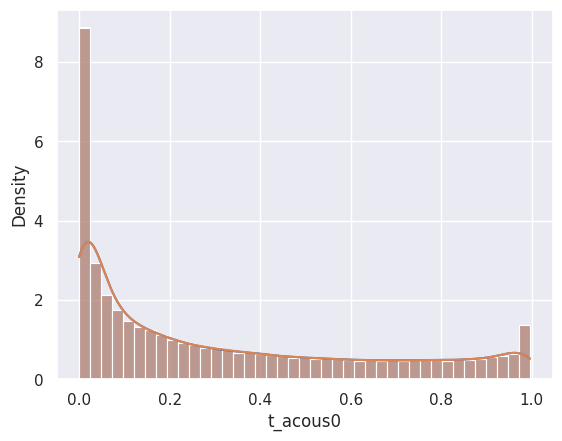

In [156]:
test_density_fillna(df, "t_acous0", df["t_acous0"].mean())

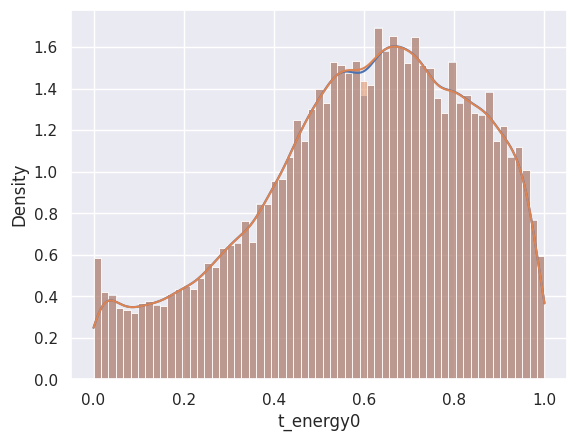

In [157]:
test_density_fillna(df, "t_energy0", df["t_energy0"].mean())

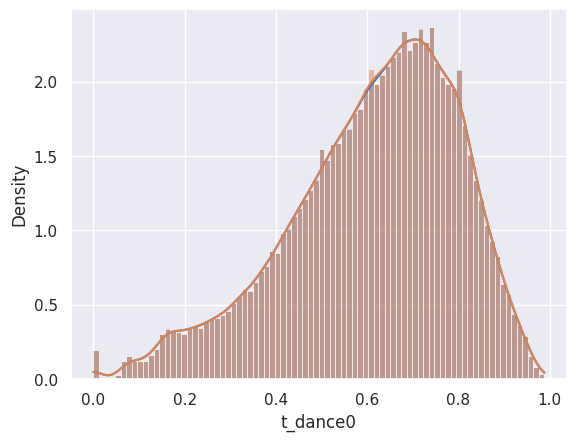

In [158]:
test_density_fillna(df, "t_dance0", df["t_dance0"].mean())

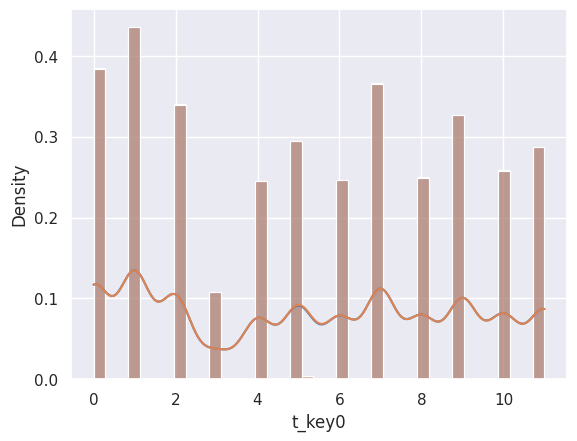

In [159]:
test_density_fillna(df, "t_key0", df["t_key0"].mean())

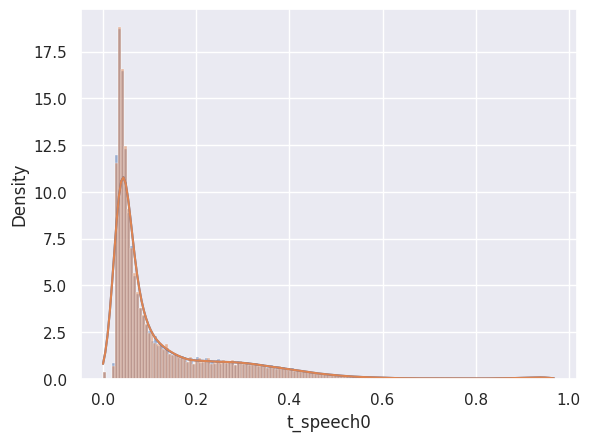

In [160]:
test_density_fillna(df, "t_speech0", df["t_speech0"].mean())

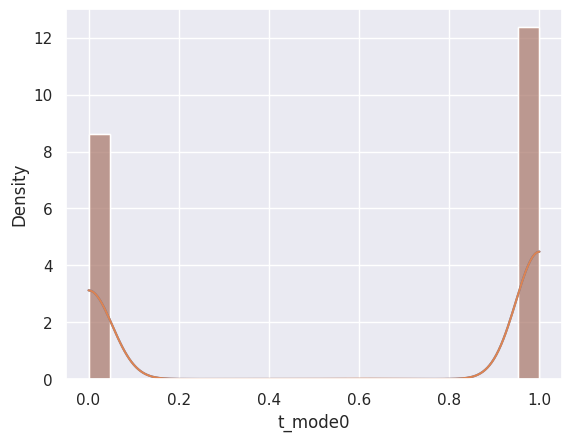

In [161]:
test_density_fillna(df, "t_mode0", df["t_mode0"].mean())

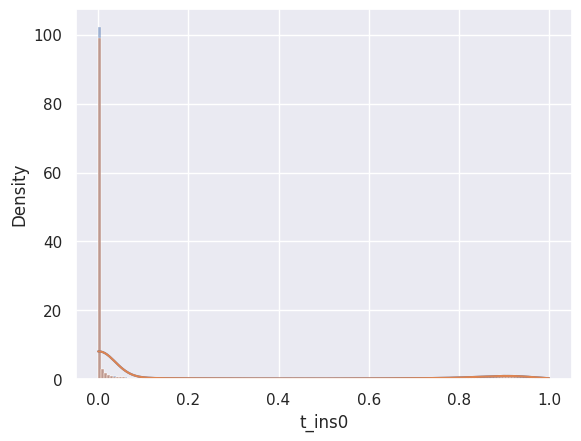

In [162]:
test_density_fillna(df, "t_ins0", df["t_ins0"].mean())

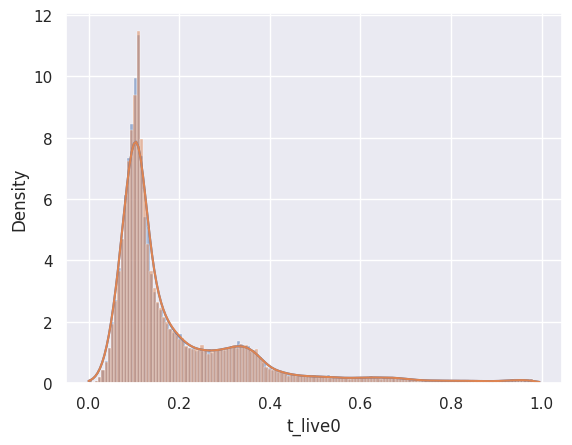

In [163]:
test_density_fillna(df, "t_live0", df["t_live0"].mean())

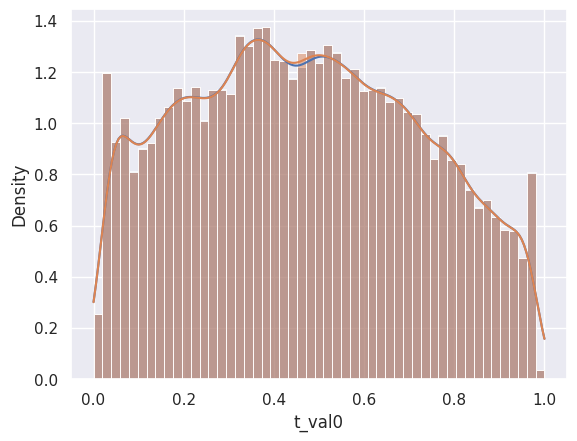

In [164]:
test_density_fillna(df, "t_val0", df["t_val0"].mean())

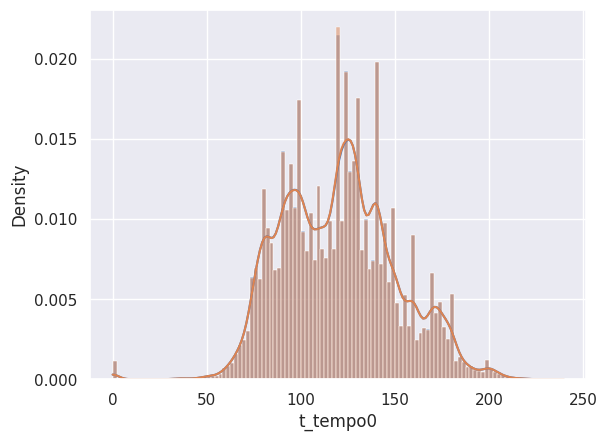

In [165]:
test_density_fillna(df, "t_tempo0", df["t_tempo0"].mean())

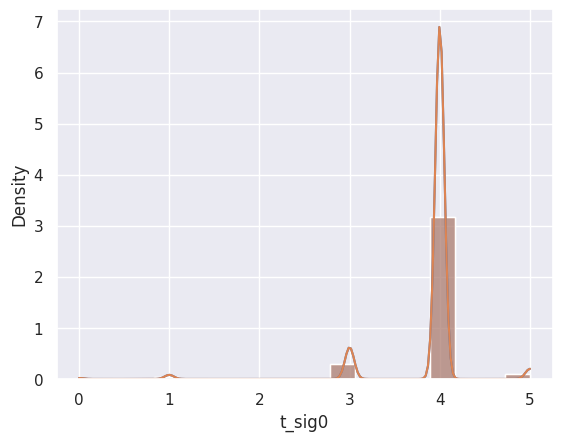

In [166]:
test_density_fillna(df, "t_sig0", df["t_sig0"].mean())

Видим, что распределения и плотности меняются не сильно, значит, можно заменить пропуски на среднее по столбцу для каждого признака.


In [167]:
df[['t_dance0', 't_energy0', 't_key0', 't_mode0', "t_speech0", "t_ins0", "t_live0", "t_val0", "t_tempo0", "t_sig0"]] = df[[
    't_dance0', 't_energy0', 't_key0', 't_mode0', "t_speech0", "t_ins0", "t_live0", "t_val0", "t_tempo0", "t_sig0"
    ]].fillna(df[['t_dance0', 't_energy0', 't_key0', 't_mode0', "t_speech0", "t_ins0", "t_live0", "t_val0", "t_tempo0", "t_sig0"]].mean())
df.isna().sum()


<ipython-input-167-0abd24be8fd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['t_dance0', 't_energy0', 't_key0', 't_mode0', "t_speech0", "t_ins0", "t_live0", "t_val0", "t_tempo0", "t_sig0"]] = df[[


name                0
artists             0
total_tracks        0
t_name0             0
t_dur0              0
t_dur1          30030
t_dance0            0
t_energy0           0
t_key0              0
t_key1          30088
t_key2          32464
t_mode0             0
t_mode1         30088
t_mode2         32464
t_speech0           0
t_speech1       30088
t_speech2       32464
t_acous0           80
t_ins0              0
t_live0             0
t_live1         30088
t_live2         32464
t_val0              0
t_val1          30088
t_val2          32464
t_tempo0            0
t_tempo1        30088
t_tempo2        32464
t_sig0              0
t_sig1          30088
t_sig2          32464
popularity          0
year                0
month               0
day                 0
dtype: int64

Рассмотрим признаки, имеющие большое число пропусков. Рассмотрим интерпритацию наличия пропуска: если есть пропуск, значит, объект не обладает таким качеством, значит, заполним пропуски нулями, так как заполнение средним сильно исказит распределение признака, так как пропусков в столбце больше трети от количтства объектов в датасете.

In [169]:
df[["t_dur1", "t_key1", "t_key2", "t_mode1", "t_mode2", "t_speech1", "t_speech2", "t_live1", "t_live2", "t_val1", "t_val2", "t_tempo1", "t_tempo2", "t_sig1", "t_sig2"]] = df[[
    "t_dur1", "t_key1", "t_key2", "t_mode1", "t_mode2", "t_speech1", "t_speech2", "t_live1", "t_live2", "t_val1", "t_val2", "t_tempo1", "t_tempo2", "t_sig1", "t_sig2"
    ]].fillna(0)
df.isna().sum()

<ipython-input-169-64ff0a40e435>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["t_dur1", "t_key1", "t_key2", "t_mode1", "t_mode2", "t_speech1", "t_speech2", "t_live1", "t_live2", "t_val1", "t_val2", "t_tempo1", "t_tempo2", "t_sig1", "t_sig2"]] = df[[


name             0
artists          0
total_tracks     0
t_name0          0
t_dur0           0
t_dur1           0
t_dance0         0
t_energy0        0
t_key0           0
t_key1           0
t_key2           0
t_mode0          0
t_mode1          0
t_mode2          0
t_speech0        0
t_speech1        0
t_speech2        0
t_acous0        80
t_ins0           0
t_live0          0
t_live1          0
t_live2          0
t_val0           0
t_val1           0
t_val2           0
t_tempo0         0
t_tempo1         0
t_tempo2         0
t_sig0           0
t_sig1           0
t_sig2           0
popularity       0
year             0
month            0
day              0
dtype: int64

Упс, забыл про t_acous0 :)

In [170]:
df[["t_acous0"]] = df[["t_acous0"]].fillna(df[["t_acous0"]].mean())
df.isna().sum()

<ipython-input-170-29d6597d553f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["t_acous0"]] = df[["t_acous0"]].fillna(df[["t_acous0"]].mean())


name            0
artists         0
total_tracks    0
t_name0         0
t_dur0          0
t_dur1          0
t_dance0        0
t_energy0       0
t_key0          0
t_key1          0
t_key2          0
t_mode0         0
t_mode1         0
t_mode2         0
t_speech0       0
t_speech1       0
t_speech2       0
t_acous0        0
t_ins0          0
t_live0         0
t_live1         0
t_live2         0
t_val0          0
t_val1          0
t_val2          0
t_tempo0        0
t_tempo1        0
t_tempo2        0
t_sig0          0
t_sig1          0
t_sig2          0
popularity      0
year            0
month           0
day             0
dtype: int64

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72352 entries, 0 to 72351
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          72352 non-null  object 
 1   artists       72352 non-null  object 
 2   total_tracks  72352 non-null  int64  
 3   t_name0       72352 non-null  object 
 4   t_dur0        72352 non-null  int64  
 5   t_dur1        72352 non-null  float64
 6   t_dance0      72352 non-null  float64
 7   t_energy0     72352 non-null  float64
 8   t_key0        72352 non-null  float64
 9   t_key1        72352 non-null  float64
 10  t_key2        72352 non-null  float64
 11  t_mode0       72352 non-null  float64
 12  t_mode1       72352 non-null  float64
 13  t_mode2       72352 non-null  float64
 14  t_speech0     72352 non-null  float64
 15  t_speech1     72352 non-null  float64
 16  t_speech2     72352 non-null  float64
 17  t_acous0      72352 non-null  float64
 18  t_ins0        72352 non-nu

Поскольку название песни не является признаком, вносящим ценность, удалим его. Аналогично с названием исполнителя и t_name0

In [172]:
df.drop(columns=["name"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72352 entries, 0 to 72351
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   artists       72352 non-null  object 
 1   total_tracks  72352 non-null  int64  
 2   t_name0       72352 non-null  object 
 3   t_dur0        72352 non-null  int64  
 4   t_dur1        72352 non-null  float64
 5   t_dance0      72352 non-null  float64
 6   t_energy0     72352 non-null  float64
 7   t_key0        72352 non-null  float64
 8   t_key1        72352 non-null  float64
 9   t_key2        72352 non-null  float64
 10  t_mode0       72352 non-null  float64
 11  t_mode1       72352 non-null  float64
 12  t_mode2       72352 non-null  float64
 13  t_speech0     72352 non-null  float64
 14  t_speech1     72352 non-null  float64
 15  t_speech2     72352 non-null  float64
 16  t_acous0      72352 non-null  float64
 17  t_ins0        72352 non-null  float64
 18  t_live0       72352 non-nu

<ipython-input-172-d9686551debb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["name"], axis=1, inplace=True)


In [174]:
df.drop(columns=["artists", "t_name0"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72352 entries, 0 to 72351
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total_tracks  72352 non-null  int64  
 1   t_dur0        72352 non-null  int64  
 2   t_dur1        72352 non-null  float64
 3   t_dance0      72352 non-null  float64
 4   t_energy0     72352 non-null  float64
 5   t_key0        72352 non-null  float64
 6   t_key1        72352 non-null  float64
 7   t_key2        72352 non-null  float64
 8   t_mode0       72352 non-null  float64
 9   t_mode1       72352 non-null  float64
 10  t_mode2       72352 non-null  float64
 11  t_speech0     72352 non-null  float64
 12  t_speech1     72352 non-null  float64
 13  t_speech2     72352 non-null  float64
 14  t_acous0      72352 non-null  float64
 15  t_ins0        72352 non-null  float64
 16  t_live0       72352 non-null  float64
 17  t_live1       72352 non-null  float64
 18  t_live2       72352 non-nu

<ipython-input-174-4bb7f779ef98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["artists", "t_name0"], axis=1, inplace=True)


Рассмотрим основную статичтическую информацию по набору данных. Видим, что данные разбросаны, нужно скалирование. Используем стандартное скалирование.

In [175]:
df.describe()

,total_tracks,t_dur0,t_dur1,t_dance0,t_energy0,t_key0,t_key1,t_key2,t_mode0,t_mode1,...,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity,year,month,day
count,72352.000000,7.235200e+04,7.235200e+04,72352.000000,72352.000000,72352.000000,72352.000000,72352.000000,72352.000000,72352.000000,...,72352.000000,72352.000000,72352.000000,72352.000000,72352.000000,72352.000000,72352.000000,72352.000000,72352.000000,72352.000000
mean,8.136154,2.055986e+05,1.307483e+05,0.611697,0.595152,5.254442,3.057054,2.886831,0.589634,0.359479,...,120.185057,70.460382,66.497137,3.905579,2.276274,2.144419,30.998825,2015.588456,6.110778,14.448640
std,15.387194,1.404550e+05,1.566358e+05,0.185754,0.240485,3.604668,3.767713,3.726247,0.491632,0.479851,...,30.274650,63.832127,64.156520,0.476155,1.953236,1.968221,18.379456,9.500538,3.369336,9.438279
min,1.000000,1.485000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1900.000000,1.000000,1.000000
25%,1.000000,1.510250e+05,0.000000e+00,0.498000,0.443000,2.000000,0.000000,0.000000,0.000000,0.000000,...,96.483750,0.000000,0.000000,4.000000,0.000000,0.000000,16.000000,2015.000000,3.000000,6.000000
50%,5.000000,1.926325e+05,1.400300e+05,0.639000,0.622000,5.000000,1.000000,0.000000,1.000000,0.000000,...,120.027000,87.380000,81.074500,4.000000,4.000000,3.000000,30.000000,2019.000000,6.000000,14.000000
75%,12.000000,2.364800e+05,2.188958e+05,0.751000,0.785000,8.000000,6.000000,6.000000,1.000000,1.000000,...,139.996000,125.065250,123.924000,4.000000,4.000000,4.000000,45.000000,2021.000000,9.000000,23.000000
max,1190.000000,1.082819e+07,7.054236e+06,0.988000,1.000000,11.000000,11.000000,11.000000,1.000000,1.000000,...,239.713000,248.500000,246.322000,5.000000,5.000000,5.000000,100.000000,2021.000000,12.000000,31.000000


In [177]:
X = df.drop(columns=["popularity"], axis=1)
y = df["popularity"]


In [179]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X = scaler.fit_transform(df)
X.shape

(72352, 32)

In [180]:
X

array([[-0.07383813,  0.11772111,  0.37274444, ...,  0.56960782,
         0.85751093, -0.57729569],
       [ 0.64104699, -0.33300992,  0.36857551, ...,  0.35909198,
         1.45110387,  1.54174939],
       [ 0.38108877, -0.62321159,  0.35239774, ...,  0.14857614,
        -0.62647142, -0.04753442],
       ...,
       [-0.46377547, -0.34245073, -0.8347336 , ...,  0.56960782,
        -0.03287848, -1.21300921],
       [-0.46377547,  0.16015492, -0.8347336 , ...,  0.4643499 ,
        -0.03287848,  0.48222685],
       [-0.46377547, -0.5628431 , -0.8347336 , ...,  0.56960782,
        -0.62647142,  0.05841784]])

In [181]:
df.to_csv("pre.csv", index=False)

# Модуль В

В прошлом модуле возникла ошибка, в последней ячейке неправильно были отскалированы данные (был передан не Х, а df с целевым признаком). Отскалируем правильно данные.

In [195]:
X = df.drop(columns=["popularity"], axis=1)
y = df["popularity"]

In [196]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=df.drop(columns=["popularity"], axis=1).columns)
X

,total_tracks,t_dur0,t_dur1,t_dance0,t_energy0,t_key0,t_key1,t_key2,t_mode0,t_mode1,...,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,year,month,day
0,-0.073838,0.117721,0.372744,-0.843580,-1.127528,0.484253,0.250272,-0.774734,0.834709,-0.749152,...,1.842734,-1.495025,0.885291,2.047177,0.1983,0.370529,0.434701,0.569608,0.857511,-0.577296
1,0.641047,-0.333010,0.368576,1.089098,-0.121221,1.316513,-0.545973,-0.237997,-1.199349,-0.749152,...,0.709835,1.745299,0.400767,1.270680,0.1983,0.882503,0.942777,0.359092,1.451104,1.541749
2,0.381089,-0.623212,0.352398,-1.371164,-1.485142,0.761673,-0.545973,-0.506366,-1.199349,1.334843,...,1.242200,1.212968,1.088059,0.054381,0.1983,0.882503,0.942777,0.148576,-0.626471,-0.047534
3,0.186120,-0.013567,0.458294,0.152368,0.465099,0.761673,0.781101,0.567108,0.834709,1.334843,...,-0.007560,0.003301,0.369622,0.989990,0.1983,0.882503,0.942777,-2.061840,-1.516861,-1.424914
4,-0.268807,-0.253646,0.205904,0.868374,-0.657641,1.039093,-0.545973,-0.506366,0.834709,1.334843,...,0.651404,-0.539203,0.919757,0.777040,0.1983,0.882503,0.942777,0.253834,-0.329675,-1.107057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72347,-0.463775,0.039539,-0.834734,-0.084506,1.354974,-1.180267,-0.811388,-0.774734,0.834709,-0.749152,...,-0.861292,1.513354,-1.103846,-1.036490,0.1983,-1.165394,-1.089529,0.253834,1.747900,0.058418
72348,-0.463775,-0.224975,-0.834734,-0.283696,-0.399827,-1.457687,-0.811388,-0.774734,0.834709,-0.749152,...,-0.861292,-0.853362,-1.103846,-1.036490,0.1983,-1.165394,-1.089529,0.253834,0.857511,0.270322
72349,-0.463775,-0.342451,-0.834734,0.992195,-1.805330,0.761673,-0.811388,-0.774734,0.834709,-0.749152,...,-0.861292,1.315861,-1.103846,-1.036490,0.1983,-1.165394,-1.089529,0.569608,-0.032878,-1.213009
72350,-0.463775,0.160155,-0.834734,0.916826,-0.591108,1.039093,-0.811388,-0.774734,-1.199349,-0.749152,...,-0.861292,-1.326996,-1.103846,-1.036490,0.1983,-1.165394,-1.089529,0.464350,-0.032878,0.482227


Импортируем библиотеки для вывода метрик качества модели на данных. Поскольку у нас задача регрессии, будем использовать стандартные метрики качества: MSE, MAE, MAPE, R2, RMSE. Сконструируем специальную функцию для удобного вывода всех метрик качества.

In [198]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from math import sqrt

In [199]:
def regression_report(y_true: np.ndarray, y_pred: np.ndarray) -> None:
    return f"""
MAE: {mean_absolute_error(y_true, y_pred)}
MSE: {mean_squared_error(y_true, y_pred)}
RMSE: {sqrt(mean_squared_error(y_true, y_pred))}
MAPE: {mean_absolute_percentage_error(y_true, y_pred)}
R^2: {r2_score(y_true, y_pred)}
    """

Произведем отбор признаков на основе методов отбора (выбор из существующих) и построения новых признаков по данным. Будем основываться на метриках базовой модели для задачи регрессии BaggingRegressor из библиотеки sklearn.

In [208]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split

REGRESSOR = BaggingRegressor

Сконструируем специальную вспомогательную функцию для облегчения процесса поиска оптимальных признаков. Данная функция будет делить выборку в соотношении 2 к 10 (относительно теста и тренировки на данных). В тестовую выборку перейдет 20% данных, а в обучающую -- 80%, чтобы модель увидела больше данных и вынесла более точное решение по поводу отбора признаков. Для того, чтобы внести элемент случайности в данные на случай, если было внесено отношение порядка по одному из атрибутов, используем параметр shuffle=True, который позволит перемешать данные в случайном порядке. базовый регрессор обучается на тренировочной выборке и показывает значение метрик. При желании, можно вернуть данную обученную модель.

In [209]:
def result(X: np.ndarray, y: np.ndarray, return_estimator=False, **kwargs) -> None:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=13)

    model = REGRESSOR(**kwargs).fit(X_train, y_train)

    print(regression_report(y_test, model.predict(X_test)))

    if return_estimator:
        return model

Импортируем из библиотеки sklearn все необходимые методы понижения размерности и вспомогательные инструменты

In [212]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, RFE
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap

Попробуем обучить базовый регрессор на всех признаках, чтобы было с чем сравнивать.

In [211]:
result(X, y)


MAE: 14.023328413806265
MSE: 297.6199291943689
RMSE: 17.251664534020158
MAPE: 1.5596520829915483
R^2: 0.1174513111076878
    


Видим, что качество регрессии нельзя назвать удовлеитворительным. Попробуем разобраться, с чем это связано.

<Axes: >

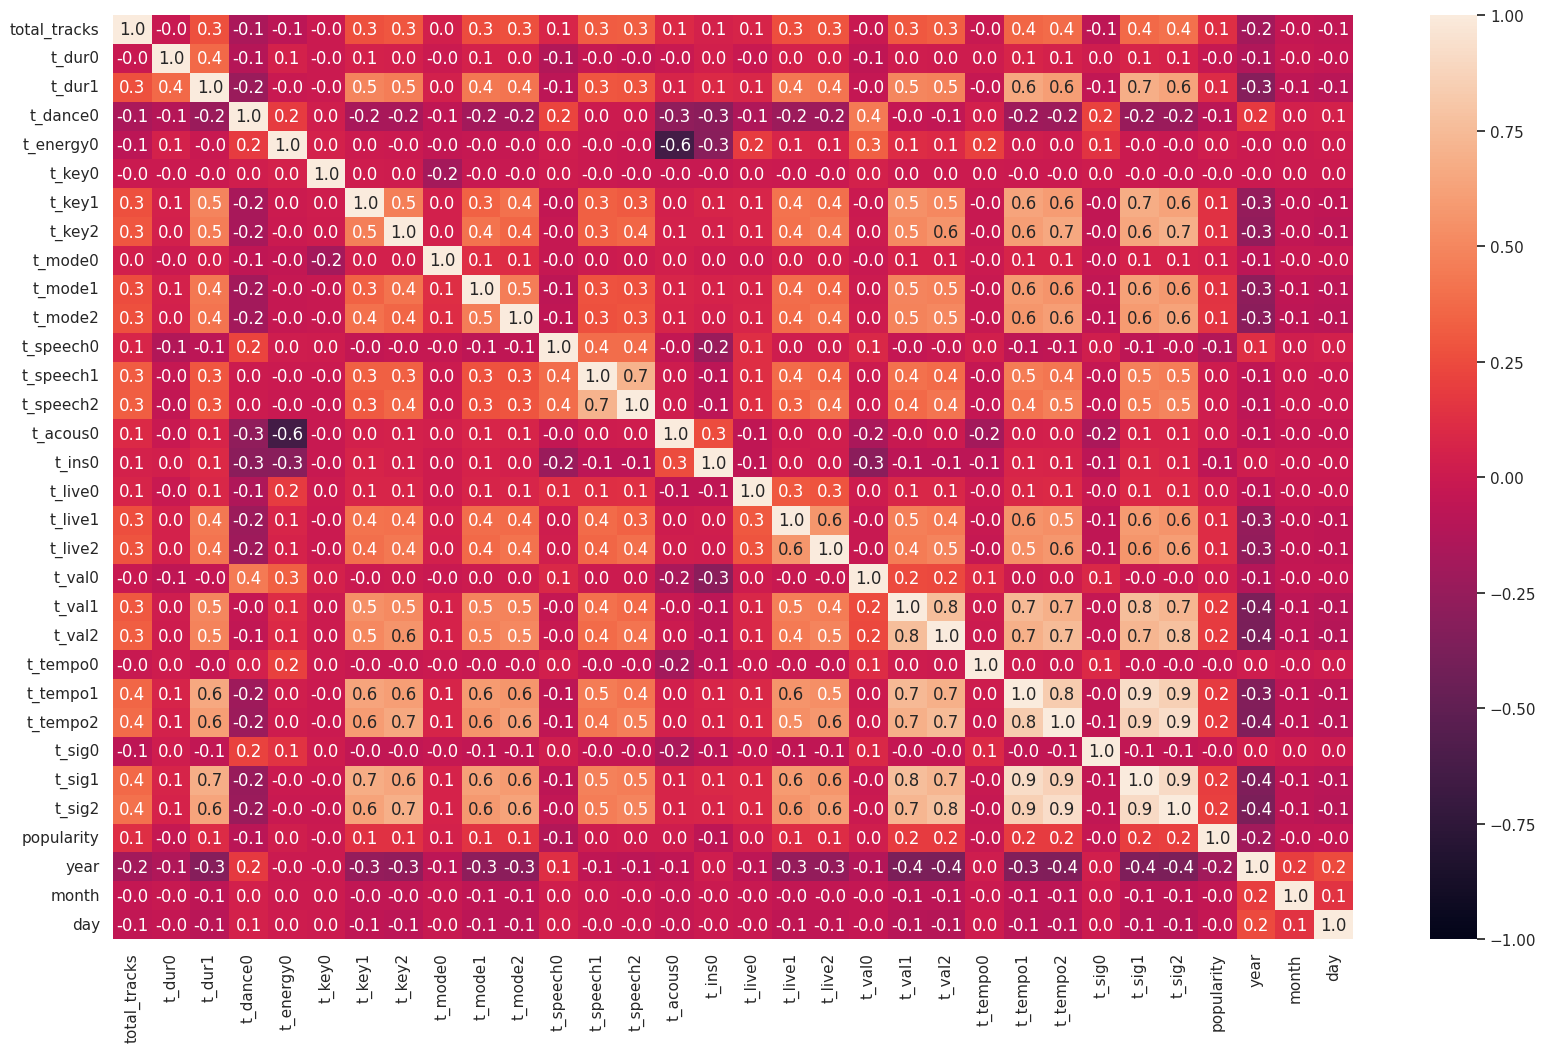

In [265]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(data=df.corr(), annot=True, vmin=-1, vmax=1, fmt='.1f')

Попробуем рассмотреть некоторые точечные графики распределения признаков (ввиду невозможности вывести график рассеняия по причине большого числа данных и признаков (график не вывелся при времени ожидания больше 25 минут)).

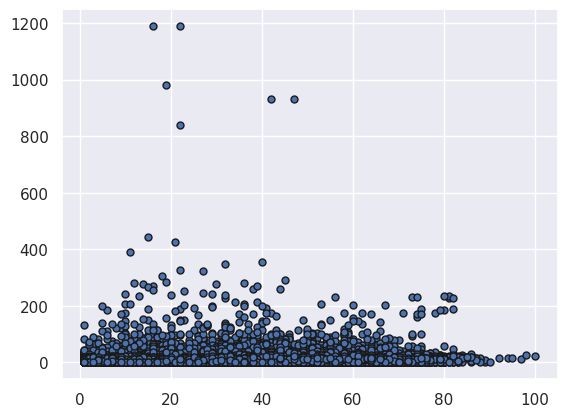

In [267]:
plt.scatter(df["popularity"], df["total_tracks"], s=25, edgecolor="k")
plt.show()

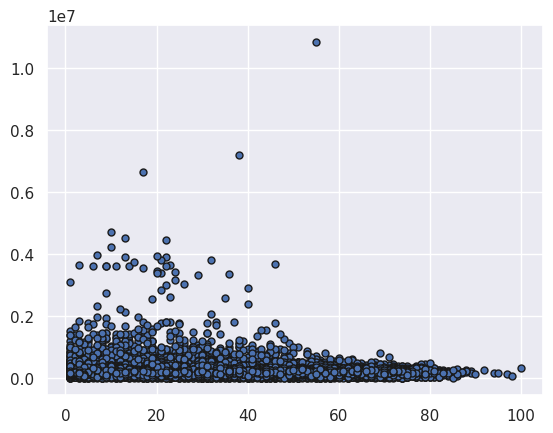

In [268]:
plt.scatter(df["popularity"], df["t_dur0"], s=25, edgecolor="k")
plt.show()

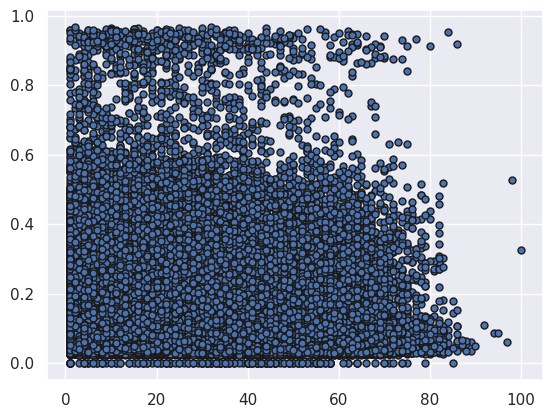

In [269]:
plt.scatter(df["popularity"], df["t_speech0"], s=25, edgecolor="k")
plt.show()

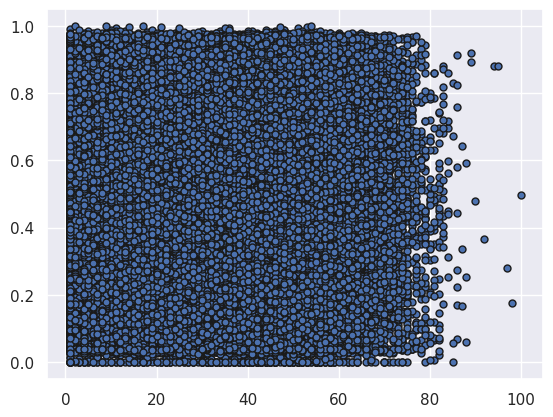

In [271]:
plt.scatter(df["popularity"], df["t_val0"], s=25, edgecolor="k")
plt.show()

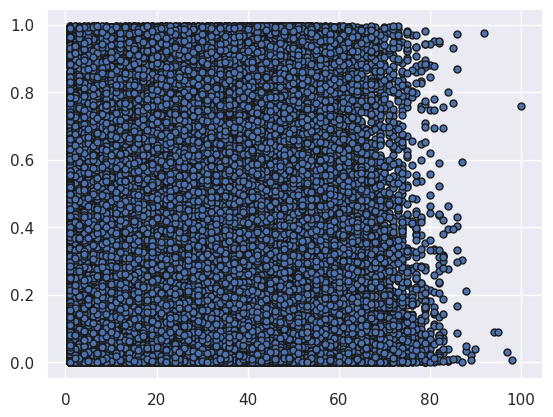

In [272]:
plt.scatter(df["popularity"], df["t_acous0"], s=25, edgecolor="k")
plt.show()

Видно, что признаки не обладают структурой, они перемешаны друг с дргом при проекции на соответствующие плоскости, поэтому может возникнуть проблема с моделями.

Как можно увидеть из тепловой карты, наблюдается очень слабая линейная корреляционная зависимость между целевым признаком и исходным ипризнаками. Это может составить серьезную проблему для линейных моделей и деревьев, поэтому нужно попробовать понадеяться на ансамбли или нейронную сеть.

Попробуем воспользоваться первым методом для отбора признаков -- VarianceThreshold. Данный метод отметает те признаки, стандартные квадратические отклонения которых меньше заданного порога. Поскольку мы производили скалирование данных, то есть центрировали и нормировали значения каждого признака, дисперсии признаков стали стремиться к единице, поэтому оптимальным будетвыставить порог 1, чтобы отсеять признаки с небольшой дисперсией (среднеквадратическое отклонение -- это квадрат дисперсии).

In [213]:
# 1. VarianceThreshold - отбор по дисперсии

vt = VarianceThreshold(1)
X_vt = vt.fit_transform(X)
print(X_vt.shape)
result(X_vt, y)

(72352, 9)

MAE: 15.137138432689442
MSE: 344.75051833427574
RMSE: 18.567458585769774
MAPE: 1.6614763756080992
R^2: -0.022307608144598534
    


Получаем крайне неудовлетворительный результат, коэффициент детерминации R2 < 0.

ПОсмотрим, какие признаки оставил VarianceThreshold.

In [214]:
vt.get_feature_names_out()

array(['total_tracks', 't_key2', 't_mode1', 't_mode2', 't_speech2',
       't_val0', 't_val1', 't_sig1', 'year'], dtype=object)

Теперь попробуем посмотреть отбор признаков при помощи метода SelectKBest, который основан на статистическом тесте Фишера, который исследует взаимосвязь с целевым признаком. Установим количество признаков для оставления в пределе от 10 до 32 и посмотрим, что получится.

In [230]:
for i in range(10, 32):
    skb = SelectKBest(k=i)
    X_skb = skb.fit_transform(X, y)
    print(f"Значение метрик при количестве признаков k = {i}:")
    result(X_skb, y)

Значение метрик при количестве признаков k = 10:

MAE: 14.896984503723022
MSE: 329.22211400599105
RMSE: 18.14447888493883
MAPE: 1.6753033965571753
R^2: 0.02373962033776289
    
Значение метрик при количестве признаков k = 11:

MAE: 14.85363913276346
MSE: 328.82766533706837
RMSE: 18.13360596619074
MAPE: 1.6824629196204473
R^2: 0.024909300595853612
    
Значение метрик при количестве признаков k = 12:

MAE: 15.209062930841217
MSE: 347.69932445047067
RMSE: 18.64669741403208
MAPE: 1.6747318413989183
R^2: -0.031051864548025998
    
Значение метрик при количестве признаков k = 13:

MAE: 14.986911839834557
MSE: 339.3056996210342
RMSE: 18.42025243098026
MAPE: 1.6393999090908555
R^2: -0.006161788778149546
    
Значение метрик при количестве признаков k = 14:

MAE: 15.031522229554351
MSE: 339.97151104806574
RMSE: 18.438316383229402
MAPE: 1.6471275535874774
R^2: -0.008136155896530495
    
Значение метрик при количестве признаков k = 15:

MAE: 15.048914632607055
MSE: 342.3504724714435
RMSE: 18.502

Видим, что при отборе признаков данным методом невозможно заключить, что радикальный отброс признаков способен улучшить значение метрик, однако видно, что метод выходит на "плато", начиная от k = 24, где коэффициент детерминации держится относительно стабильно. Вспоминая то, что признаки не сильно взаимосвязаны друг с другом, получаем, что при подьоре признаков будем отталкиваться от данного результата.

Попробуем метод отбора, основанный на коэффициенте информативности, которым пользуется дерево решений при обучении. Признаки с наибольшим значением коэффициета остаются. Произведем самостоятельный подбор порогов признаков ввиду больших временных затрат, связанных с вычислением и обучением деерва.

In [223]:
# 3. RFE - рекурсивный отбор признаков относительно индекса информативности решающего дерева

tree = DecisionTreeRegressor().fit(X, y)

rfe = RFE(estimator=tree, n_features_to_select=14, step=1).fit(X, y)
X_rfe = pd.DataFrame(rfe.transform(X), columns=rfe.get_feature_names_out())
rfe.get_feature_names_out()

array(['total_tracks', 't_dur0', 't_dur1', 't_dance0', 't_energy0',
       't_speech0', 't_speech1', 't_acous0', 't_ins0', 't_live0',
       't_val0', 't_tempo0', 'year', 'day'], dtype=object)

In [225]:
result(X_rfe, y)


MAE: 14.060858531512945
MSE: 300.55902059544843
RMSE: 17.336638099569605
MAPE: 1.5713128439026864
R^2: 0.10873586228146548
    


Получаем, что, примерно, при 14 призннаках результат RFE показывает себя так же, как SelectKBest при 24. Получаем, что на данный момент этот метод является самым оптимальным, потому что он сохраняет значения столбцов и быстро работает при повторном трансформировании поступивших данных.

Вихуализируем график с коэффициентами информативности дерева.

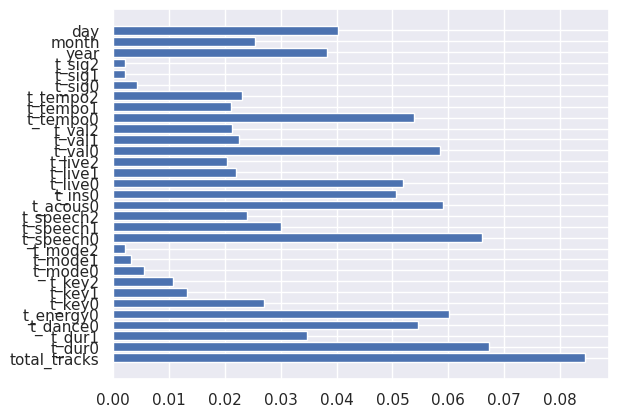

In [229]:
plt.barh(width=tree.feature_importances_, y=X.columns);

Также попробуем отобрать признаки при помощи модели линейной регрессии Lasso. Если коэффициент при признаке занулится, то это будет означать, что признак не вносит вклад в предсказание целевого признака.

In [235]:
from sklearn.linear_model import Lasso

lr = Lasso(0.6).fit(X, y)
X.columns[lr.coef_ > 1e-7]

Index(['total_tracks', 't_mode1', 't_mode2', 't_val1', 't_val2', 't_sig1',
       't_sig2'],
      dtype='object')

Видим, что данный метод выбрал некоторые признаки, которые отобрал RFE, что подтверждает правильность его выбора. Однако существую расхождения, так как линйеные модели плохо применимы для данного набора данных, потому что отсутствует линейная корреляционная зависимость. Признаки, которые мы визуализировали выше, из графиков, не обладают четкой структурой, они хаотичны, поэтому качество модели плохое.

Настало время попробовать методы выделения признаков. Ввиду сложности и длительности использования алгоритма t-SNE, попробуем метод главных компонент PCA, уоторый строит переход в новое пространство на основании собственных чисел матрицы ковариации признаков.

In [238]:
for i in range(10, 20):
    pca = PCA(n_components=14)
    X_pca = pca.fit_transform(X, y)
    print(f"Значение метрик при количестве признаков k = {i}:")
    result(X_pca, y)

Значение метрик при количестве признаков k = 10:

MAE: 14.620829590214914
MSE: 321.4980012168641
RMSE: 17.93036533974877
MAPE: 1.6436150451771785
R^2: 0.046644355357870815
    
Значение метрик при количестве признаков k = 11:

MAE: 14.623409084178208
MSE: 321.2132363315575
RMSE: 17.922422724943118
MAPE: 1.6222385961222276
R^2: 0.04748878428052472
    
Значение метрик при количестве признаков k = 12:

MAE: 14.572252781424917
MSE: 320.3627802956527
RMSE: 17.898680965245813
MAPE: 1.6244008184879202
R^2: 0.050010688178156903
    
Значение метрик при количестве признаков k = 13:

MAE: 14.537931050936027
MSE: 316.8759193157407
RMSE: 17.801008940948844
MAPE: 1.6115388507843782
R^2: 0.060350468160301096
    
Значение метрик при количестве признаков k = 14:

MAE: 14.592567400811475
MSE: 318.9951284112736
RMSE: 17.860434720668856
MAPE: 1.6229755845324159
R^2: 0.05406626127330272
    
Значение метрик при количестве признаков k = 15:

MAE: 14.617927102151759
MSE: 321.03893926531225
RMSE: 17.917559

Видим, что значение метрик даже не приблизилось к RFE, поэтому данный метод не является оптимальным.

После отбора признаков необходимо обучать модели машинного обучения на новом признаковом пространстве. Сперва разделим выборку на обучающую и тестовую по тому же принципу, по которому делили ее во вспомогательной функции для отбора признаков, только соотношение сделам чуть больше в сторону тестовой части.

In [243]:
X_train, X_test, y_train, y_test = train_test_split(rfe.transform(X), y, test_size=0.3, shuffle=True, random_state=13)

Импортируем вспомогательный инструмент для поиска по сетке для подбора гиперпараметров модели из библиотеки sklearn -- GridSearchCV.

In [244]:
from sklearn.model_selection import GridSearchCV

Сперва будем учить ансамбль Bagging. По сетке будем подбирать ему число базовых эстиматоров, коими выступают решающие деревья. При таком подходе получится минимизация вероятности переобучения.

In [246]:
grid_bagging = {
    'n_estimators': np.arange(9, 19, 2),
}

bagging = GridSearchCV(BaggingRegressor(estimator=DecisionTreeRegressor()), grid_bagging).fit(X_train[:1000], y_train[:1000])
y_pred = bagging.predict(X_test)
print(regression_report(y_test, y_pred))


MAE: 14.770602243973663
MSE: 326.1016665966981
RMSE: 18.058285261804293
MAPE: 1.6579588910123053
R^2: 0.03823560666147263
    


В результате получаем крайне неудовлетворительный результат, это не наш кандидат.

Обратимся к старшим братьям бэггинга -- XGBRegressor и CatBoostRegressor, основанные на технике градиентного бустинга. Подбор гиперпараметров также осуществлен вручную ввиду ограниченности по времени.

In [251]:
from xgboost import XGBRegressor

xg_reg = XGBRegressor(max_depth=3).fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)

print(regression_report(y_test, y_pred))


MAE: 13.745794434970527
MSE: 279.74221817326605
RMSE: 16.72549605163524
MAPE: 1.5876094253152853
R^2: 0.17496249694018162
    


In [253]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 6.6 MB/s eta 0:00:00


In [260]:
from catboost import CatBoostRegressor

cat_reg = CatBoostRegressor(201).fit(X_train, y_train)
y_pred = cat_reg.predict(X_test)

print(regression_report(y_test, y_pred))

Learning rate set to 0.280543
0:	learn: 17.8730721	total: 11.5ms	remaining: 2.29s
1:	learn: 17.5833711	total: 21.8ms	remaining: 2.17s
2:	learn: 17.4019391	total: 31.9ms	remaining: 2.1s
3:	learn: 17.2723559	total: 41.5ms	remaining: 2.04s
4:	learn: 17.1797484	total: 51.8ms	remaining: 2.03s
5:	learn: 17.1175561	total: 62.3ms	remaining: 2.02s
6:	learn: 17.0636081	total: 72.1ms	remaining: 2s
7:	learn: 17.0198673	total: 82.2ms	remaining: 1.98s
8:	learn: 16.9889265	total: 92.6ms	remaining: 1.98s
9:	learn: 16.9622440	total: 103ms	remaining: 1.96s
10:	learn: 16.9367770	total: 115ms	remaining: 1.99s
11:	learn: 16.9170540	total: 125ms	remaining: 1.97s
12:	learn: 16.8944449	total: 135ms	remaining: 1.95s
13:	learn: 16.8690863	total: 145ms	remaining: 1.94s
14:	learn: 16.8476541	total: 156ms	remaining: 1.94s
15:	learn: 16.8348935	total: 167ms	remaining: 1.93s
16:	learn: 16.8149210	total: 177ms	remaining: 1.91s
17:	learn: 16.8031297	total: 186ms	remaining: 1.89s
18:	learn: 16.7916697	total: 199ms	rema

В результате получаем, что лучшее качество модели у CatBoostRegressor, если судить по коэффициенту детерминации.

Ввиду нелинейности зависимости признаков и целевого признака, попробуем обучить полносвязную нейронную сеть прямого распространения с двумя скрытыми слоями и функцией активации ReLU, оптимизатором Adam. Также подберем гиперпараметры самостоятельно ввиду затратности по времени.

In [263]:
import tensorflow as tf

regression_model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(1, activation="linear"),
    ]
)

regression_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse")
regression_model.fit(X_train, y_train, epochs=25, verbose=None)

y_pred = regression_model.predict(X_test)
print(regression_report(y_test, y_pred))

679/679 [==============================] - 1s 2ms/step

MAE: 13.98237527619526
MSE: 289.40848251423085
RMSE: 17.01200994927498
MAPE: 1.5489335701661937
R^2: 0.14645399848091
    


Заключаем, что нейронная сеть справилась не так хорошо, как предполагалось, даже с увеличением и уменьшением числа слоев и нейронов. Причем лучшее качество вышло именно при такой архитектуре.

# Модуль С

Создадим новый датафрейм, состоящий только из тех признаков, которые были отобраны в прошлом модуле при помощи алгоритма RFE (на которых учились модели).

In [280]:
new_df = pd.DataFrame(rfe.transform(df.drop(columns=["popularity"], axis=1)), columns=rfe.get_feature_names_out())
new_df

,total_tracks,t_dur0,t_dur1,t_dance0,t_energy0,t_speech0,t_speech1,t_acous0,t_ins0,t_live0,t_val0,t_tempo0,year,day
0,7.0,222133.0,189133.0,0.455,0.324,0.0420,0.0298,0.5370,0.000000,0.1250,0.626,74.924,2021.0,9.0
1,18.0,158826.0,188480.0,0.814,0.566,0.3440,0.0683,0.0810,0.000023,0.1060,0.158,173.023,2019.0,29.0
2,14.0,118066.0,185946.0,0.357,0.238,0.2650,0.3570,0.1420,0.085900,0.5500,0.494,156.907,2017.0,14.0
3,11.0,203693.0,202533.0,0.640,0.707,0.0283,0.0277,0.0260,0.000001,0.1820,0.755,120.285,1996.0,1.0
4,4.0,169973.0,163000.0,0.773,0.437,0.0963,0.0631,0.8360,0.000024,0.5440,0.707,103.861,2018.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72347,1.0,211152.0,0.0,0.596,0.921,0.0635,0.0000,0.0806,0.001830,0.1010,0.867,166.001,2018.0,15.0
72348,1.0,174000.0,0.0,0.559,0.499,0.0807,0.0000,0.7360,0.000000,0.0954,0.160,94.350,2018.0,17.0
72349,1.0,157500.0,0.0,0.796,0.161,0.1310,0.0000,0.0490,0.879000,0.1130,0.447,160.022,2021.0,3.0
72350,1.0,228093.0,0.0,0.782,0.453,0.0955,0.0000,0.5200,0.000000,0.3530,0.435,80.011,2020.0,19.0


Поскольку старый скейлер был заточен исключительно на данные, состоящие из всех признаков, создадим новый скейлер, который будет по тому же принципу трансформировать данные (значения будут теми же, только скейлер адаптировался теперь под новый ввод данных -- без признаков, которые были отброшены).

In [281]:
scaler = StandardScaler()
new_X = scaler.fit_transform(new_df)
new_X

array([[-0.07383813,  0.11772111,  0.37274444, ..., -1.49502536,
         0.56960782, -0.57729569],
       [ 0.64104699, -0.33300992,  0.36857551, ...,  1.74529872,
         0.35909198,  1.54174939],
       [ 0.38108877, -0.62321159,  0.35239774, ...,  1.2129685 ,
         0.14857614, -0.04753442],
       ...,
       [-0.46377547, -0.34245073, -0.8347336 , ...,  1.31586057,
         0.56960782, -1.21300921],
       [-0.46377547,  0.16015492, -0.8347336 , ..., -1.32699583,
         0.4643499 ,  0.48222685],
       [-0.46377547, -0.5628431 , -0.8347336 , ..., -0.33695278,
         0.56960782,  0.05841784]])

Разделим набор данных для удобного получения предсказания через файл в дашборде и визуализации данных

In [285]:
_, test = train_test_split(rfe.transform(df.drop(columns=["popularity"], axis=1)), test_size=0.2)
test.shape

(14471, 14)

In [286]:
pd.DataFrame(test, columns=rfe.get_feature_names_out()).to_csv("test.csv", sep=",", header=False, index=False)

In [314]:
pd.DataFrame(np.c_[_[:2000], y[:2000]], columns=np.append(rfe.get_feature_names_out(), ["popularity"])).to_csv("for_dashboard.csv", sep=",", header=True, index=False)

Импортируем инструменты для сериализации и десериализации модели CatBoostRegressor.

In [287]:
from joblib import dump, load

Поскольку данные обучались на скалированных данных, нельзя терять объект скейлера, при помощи которого трансформировались данные. Для удобства создадим пайплайн -- он будет совмещать в себе сесь путь работы с данными -- от скалирования до получения предсказания.

In [291]:
from sklearn.pipeline import Pipeline

catboost_pipeline = Pipeline([('scaler', scaler), ('CatBoost', cat_reg)])

Сериализуем полученный пайплайн со скейлером и моделью.

In [292]:
dump(catboost_pipeline, 'catboost_pipeline.pkl')

['catboost_pipeline.pkl']

Установим необходимые библиотеки для создания дашборда.

In [293]:
!pip install -q streamlit
!pip install -q streamlit-option-menu
!pip install -q plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 799.2/799.2 kB 14.2 MB/s eta 0:00:00


Поскольку дашборд нужно делать в ячейке, скачаем дополнительный функционал для разработки дашблорда.

In [294]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 7.402s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



Напишем код самого дашборда. Глобально, стртовой точкой дашборда будет являться меню с выбором основного функционала приложения -- описание данных модели и датасета, визуализация данных и получение предсказания. Каждая возможность дашборда представлена в виде соответствующей функции, которая вызывается при выборе пользователя того или иного пункта бокового главного меню. При помощи заголовка %%writefile app.py перенесем код из ячейки в файл app.py, который будем в дальнейшем запускать.
## ВАЖНО!
Чтобы проверить работу предсказания модели через загрузку файла csv, нужно загружать файл test.csv, который был сделан для удобства выше (он просто берет данные из датасета).

In [334]:
%%writefile app.py


import streamlit as st
import pandas as pd
from streamlit_option_menu import option_menu
import numpy as np
import joblib
import plotly.express as px
import plotly.figure_factory as ff


catboost_pipeline = joblib.load('catboost_pipeline.pkl')


df = pd.read_csv("for_dashboard.csv", sep=',', encoding="utf-8")


def upload():
    uploaded_file = st.file_uploader("Выберите файл .csv (без заголовков столбцов), разделителем является запятая:")

    if uploaded_file:
        upload_data = pd.read_csv(uploaded_file, sep=",", encoding='utf8')
        upload_data.columns = ['total_tracks', 't_dur0', 't_dur1', 't_dance0', 't_energy0',
       't_speech0', 't_speech1', 't_acous0', 't_ins0', 't_live0',
       't_val0', 't_tempo0', 'year', 'day']

    if st.button("Получить предсказание", key='1'):
        if not uploaded_file:
            st.warning('Сначала нужно загрузить данные!', icon="⚠️")
        else:
            y_pred = catboost_pipeline.predict(upload_data)
            upload_data['popularity'] = y_pred
            st.write(upload_data)
            st.download_button("Сохранить результат", upload_data.to_csv(index=False, encoding='utf8'), "predict.csv", "text/csv", key='download-csv')


def input():
    edited_df = st.data_editor(pd.DataFrame([{
        "total_tracks": "",
        "t_dur0": "",
        "t_dur1": "",
        "t_dance0": "",
        "t_energy0": "",
        "t_speech0": "",
        "t_speech1": "",
        "t_acous0": "",
        "t_ins0": "",
        "t_live0": "",
        "t_val0": "",
        "t_tempo0": "",
        "year": "",
        "day": "",
    }]), num_rows="dynamic", use_container_width=False, width = 1000)

    if st.button("Получить предсказание", key='2'):
        try:
            y_pred = catboost_pipeline.predict(edited_df)
            edited_df['popularity'] = y_pred
            st.write(edited_df)
            st.download_button("Сохранить результат", edited_df.to_csv(index=False, encoding='utf8'), "predict.csv", "text/csv", key='download-csv')
        except:
            st.warning('Некорректные данные!', icon="⚠️")


def prediction():
    tab1, tab2 = st.tabs(["Загрузка файла .csv", "Ручной ввод значений"])

    with tab1:
        upload()

    with tab2:
        input()


INFO_data = r"""
# Добро пожаловать в приложение по прогнозированию популярности альбома!

![Singers](https://gamerwall.pro/uploads/posts/2022-09/1662514476_30-gamerwall-pro-p-kot-s-mikrofonom-zhivotnie-59.jpg)

Может быть, вы продюссер знаменитой группы? Или певец-самоучка? Да это и не важно, потому что любой человек сможет узнать, станет его музыкальный альбом популярным, или нет, при помощи машинного обучения! Заинтересовали? Тогда поехали!

Но ведь это весьма трудная задача -- узнать, каким будет альбом, потому что нужно время... Но модель CatBoostRegressor так не считает! Поэтому давайте разбираться, на основании каких данных модель делает заключение, и что она вообще предсказывает.

## Целевой признак

Решается задача регрессии, необходимо предсказать вещественное значение признака

$ 0 \leq popularity \leq 100$

-- это и есть наша популярность альбома, зависящая от других признаков, о которых речь пойдет далее.

## Входные данные

Данные, конечно, - это хорошо, но правильные данные - еще лучше! Чтобы получить достоверное (или не очень) предсказание, разберемся, в чем заключается смысл данных, и какие объекты нужно подавать на вход модели машинного обучения.

|  Название столбца  | Описание                                   |Тип данных|
| ------------------ | ------------------------------------------ | -----    |
| total_tracks       | Общее чисто треков исполнителя             | int64    |
| t_dur0             | Длительность трека (0)                     | int64    |
| t_dur1             | Длительность трека (1)                     | float64  |
| t_dance0           | Степень использования для танцев (0)       | float64  |
| t_energy0          | Энергичность (0)                           | float64  |
| t_speech0          | Степень сложности текста (0)               | float64  |
| t_speech1          | Степень сложности текста (1)               | float64  |
| t_acous0           | Акустичность                               | float64  |
| t_ins0             | Безумность                                 | float64  |
| t_live0            | Жизнерадостностность                       | float64  |
| t_val0             | Значимость (0)                             | float64  |
| t_tempo0           | Темп (0)                                   | float64  |
| year               | Год -- выход альбома                       | int64    |
| day                | Число -- выход альбома                     | int64    |
"""


INFO_model = r"""
# Описание использованной модели

Чтобы решить поставленную задачу, было принято решение использовать модель CatBoostRegressor из библиотеки CatBoost (отечтественный продукт, между прочим!).

## Предобработка данных

Сперва был произведен отбор признаков при помоши метода выделения нового признаковго пространства из имеющегося. В результате, из 32 признаков удалось оставить лишь 14 при сохранении качства модели. Признаки были отобраны при помощи алгоритма RFE, так как он показал наилучшее качество при использовании его с решающим деревом.

Также данные были скалированы при помощи StandardScaler, так как в результате вывода признаков они были похожи на нормальное распределение.

## Модели

 Было рассмотрено множество моделей, сравнение между которыми было осуществлено за счет значения коэффициента детерминации. В результате, CatBoostRegressor показал лучшее качество.

|  Модель   | Качество метрики $R^2$  |
| --------  | ----------------------- |
| НС        | 0.146                   |
| Bagging   | 0.038                   |
| XGBoost   | 0.175                   |
| CatBoost  | 0.183                   |
| Lasso     | -0.03                   |

## Механизм работы градиентного бустинга

CatBoostRegressor -- это ансамблиевый метод, основанный на технике градиентного бустинга. Данная модель была обучена с 201 деревом.

![GB](https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-3-030-34482-5_25/MediaObjects/482246_1_En_25_Fig2_HTML.png)
"""


def data_description():
    st.markdown(INFO_data)


def model_description():
    st.markdown(INFO_model)


def draw_depend():
    options = st.multiselect('Выберите пару признаков, чтобы отобразить зависимость между ними',
                             ['total_tracks', 't_dur0', 't_dur1', 't_dance0', 't_energy0',
       't_speech0', 't_speech1', 't_acous0', 't_ins0', 't_live0',
       't_val0', 't_tempo0', 'year', 'day', 'popularity'], max_selections=2)

    if len(options) == 2:
        fig1 = px.scatter(df, y=options[1], x=options[0], height=550, width=650)
        fig1.update_traces(marker_size=10)
        st.plotly_chart(fig1, use_container_width=True)


@st.cache_data
def draw_corr():
    fig2 = px.imshow(df.corr(), height=700, width=850)
    st.plotly_chart(fig2, use_container_width=True)


def draw_box():
    type = st.selectbox('Название признака', ['total_tracks', 't_dur0', 't_dur1', 't_dance0', 't_energy0',
       't_speech0', 't_speech1', 't_acous0', 't_ins0', 't_live0',
       't_val0', 't_tempo0', 'year', 'day', 'popularity'])
    fig3 = px.box(df, y=type, height=550, width=650)
    st.plotly_chart(fig3, use_container_width=True)


def visualization():
    tab1, tab2, tab3 = st.tabs(["График зависимостей признаков", "Матрица корреляции", "Ящик с усами"])

    with tab1:
        st.write("""
        График зависимостей показывает точки в двумерном пространстве, координаты которых являются значениями выбранных признаков из исходного признакового пространства. Тем самым получается установить зависимости между признаками для лучшего подбора алгориотма.
        """)
        draw_depend()

    with tab2:
        st.write("""
        Матрица корреляции позволяет исследовать признаки на наличие попарной линейной зависимости (как прямой, так и обратной). Благодаря этому можно проверить мультиколлинеарность признаков.
        """)
        draw_corr()

    with tab3:
        st.write("""
        "Ящик с усами" позволяет исследовать признак с точки зрения случайной величины - найти математическое ожидание признака, его среднеквадратическое отклонение и диапозон, в котором находится большинство число объектов. Помогает искать выбросы.
        """)
        draw_box()



IoC = {
    "app":
    {
        "Описание данных": data_description,
        "Описание модели": model_description,
        "Визуализация данных": visualization,
        "Предсказание": prediction,
    }
}


if __name__ == "__main__":
    with st.sidebar:
            selected = option_menu("Меню", ["Описание данных", 'Описание модели', "Визуализация данных", 'Предсказание'],
                icons=['info-circle', 'info-circle', 'bar-chart', 'tag'], menu_icon="cast", default_index=0)

    IoC["app"][selected]()

Overwriting app.py


Запускаем приложение и получаем IP-адрес виртуальной машины, на которой запущен данный коллаб, чтобы через локальный тоннель увидеть результат написания кода приложения.

In [335]:
!streamlit run app.py &>/content/logs.txt & curl ipv4.icanhazip.com

34.125.89.38


Переходим по ссылке и вставляем IP-адрес.

In [336]:
!npx localtunnel --port 8501

npx: installed 22 in 1.888s
your url is: https://lovely-badgers-check.loca.lt
^C
